## Massachussets Bloom 2025 (June 16-19) - Looking at the Rrs Spectra

Login to NASA Earth Access

In [1]:
import earthaccess
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

Select the date and set the ROI bbox

In [2]:
bbox = (-71.7, 40.6, -67.8, 43.5)
import xarray as xr
results = earthaccess.search_data(
    short_name = "PACE_OCI_L2_AOP",
    temporal = ("2025-06-16", "2025-06-16"),
    bounding_box = bbox
)

len(results)

3

In [3]:
# look at the file names to make sure they are ok
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250616T160319.L2.OC_AOP.V3_1.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250616T160819.L2.OC_AOP.V3_1.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250616T174140.L2.OC_AOP.V3_1.nc']]

In [4]:
fileset = earthaccess.open(results);

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

This is level 2 data and unlike level 3 data, it has groups. We need to use `open_datatree()` and `merge().

In [5]:
# open_datatree is for netcdf files with groups
datatree = xr.open_datatree(fileset[2], decode_timedelta=False, chunks={}) 
datatree.groups

('/',
 '/sensor_band_parameters',
 '/scan_line_attributes',
 '/geophysical_data',
 '/navigation_data',
 '/processing_control',
 '/processing_control/input_parameters',
 '/processing_control/flag_percentages')

In [6]:
# We merge the groups all together so we have the lat/lon and 
# This works due to the values in each group have the same shape.
ds = xr.merge(datatree.to_dict().values())
ds = ds.set_coords(("longitude", "latitude"))
ds

<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 172, number_of_lines: 1709,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
    longitude      (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    latitude       (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/30)
    wavelength     (number_of_bands) float64 2kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_gain      (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    vcal_offset    (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    F0             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    aw             (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    bbw            (number_of_reflective_bands) float32 1kB dask.array<chunksize=(32,), meta=np.ndarray>
    ...             ...
    aot_865        (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    angstrom       (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    avw            (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    nflh           (number_of_lines, pixels_per_line) float32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    tilt           (number_of_lines) float32 7kB dask.array<chunksize=(32,), meta=np.ndarray>
Attributes: (12/47)
    title:                             OCI Level-2 Data AOP
    product_name:                      PACE_OCI.20250616T174140.L2.OC_AOP.V3_...
    processing_version:                3.1
    history:                           l2gen par=/data2/sdpsoper/vdc/vpu1/wor...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_min:                -96.87121
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9689275622367859
    geospatial_bounds:                 POLYGON ((-62.63189 49.12356, -96.8712...

In [7]:
# Fix a chunk mismatch and check the chunking; ignore the warning
# We are good for dask backed operations
ds = ds.unify_chunks()
ds.chunks

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/structure/chunks.py:180: PerformanceWarning: Increasing number of chunks by factor of 81
  _, chunked_data = chunkmanager.unify_chunks(*unify_chunks_args)


Frozen({'number_of_bands': (32, 32, 32, 32, 32, 32, 32, 32, 30), 'number_of_reflective_bands': (32, 32, 32, 32, 32, 32, 32, 32, 30), 'number_of_lines': (32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 13), 'pixels_per_line': (256, 256, 256, 256, 248), 'wavelength_3d': (40, 40, 40, 40, 12)})

## Let's open it up!

Let's load up our libraries, and then extract the relevant data we need. 

In [8]:
# ---- Load Libraries ----
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
from scipy.integrate import trapezoid
from scipy.spatial import cKDTree
from matplotlib.colors import Normalize

In [9]:
# Assign core variables; for convenience during plotting
rrs_da = ds["Rrs"]
avw_da = ds["avw"]
wavelengths = ds["wavelength_3d"]

In [10]:
# This takes a few seconds to run
# rrs_da is a dask array (chunked). We use .compute() for force it to compute now
brightness = rrs_da.integrate(coord='wavelength_3d').compute()

Let's just do a quick comparison of the two spectral rasters - AVW (focused on spectral shape), and brightness (focused on spectral magnitude).

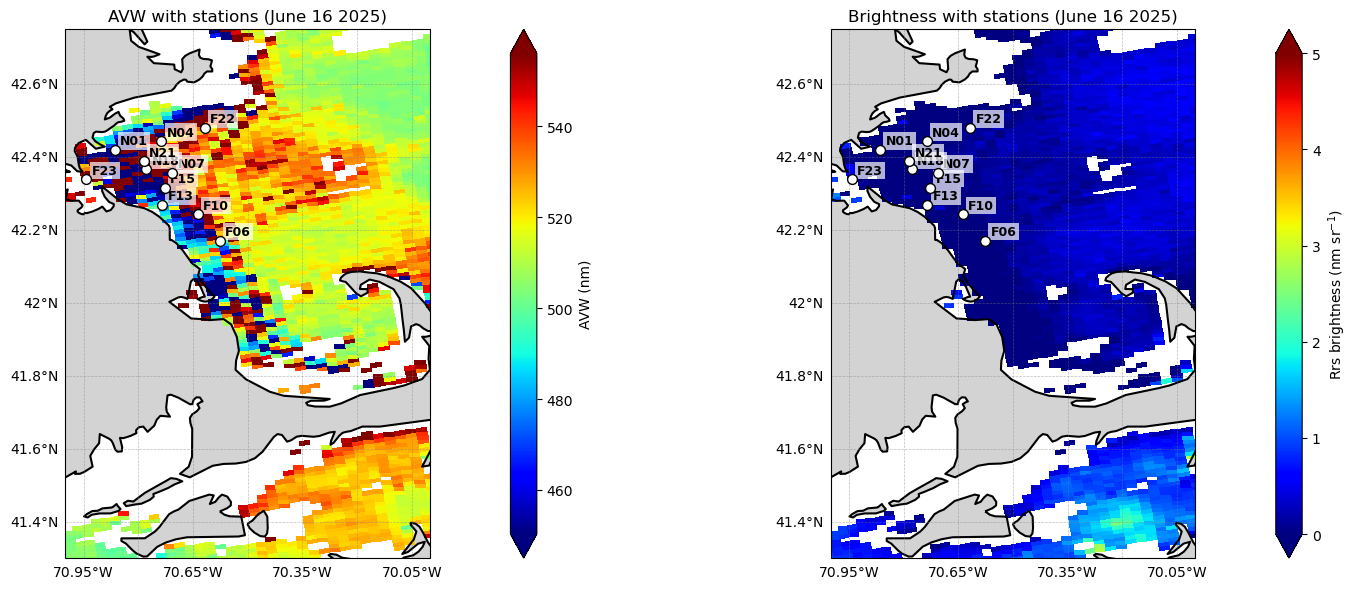

In [11]:
# Outlier clipping for AVW
vmin = float(avw_da.quantile(0.01))
vmax = float(avw_da.quantile(0.99))

# Figure with two map panels
fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Stations
stations = [
    ("F06", 42.17067, -70.57667),
    ("F10", 42.24233, -70.63733),
    ("F13", 42.26833, -70.73500),
    ("F15", 42.31550, -70.72767),
    ("F22", 42.47983, -70.61767),
    ("F23", 42.33917, -70.94200),
    ("N01", 42.41933, -70.86450),
    ("N04", 42.44383, -70.73650),
    ("N07", 42.35633, -70.70617),
    ("N18", 42.36583, -70.77767),
    ("N21", 42.38783, -70.78533)
]

# AVW Plot
ax = axes[0]

ax.coastlines(linewidth=1.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=0)
ax.set_extent([-71, -70, 41.3, 42.75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linewidth=0.5,linestyle="--", color="gray", alpha=0.5)
gl.top_labels = False
gl.right_labels = False

avw_da.plot(x="longitude", y="latitude", cmap="jet", vmin=vmin, vmax=vmax, ax=ax, cbar_kwargs={"pad": 0.1, "label": "AVW (nm)"})

for name, lat, lon in stations:
    ax.scatter(lon, lat, s=50, color="white", edgecolor="black", linewidth=1, zorder=5)
    ax.text(lon + 0.015, lat + 0.015, name, fontsize=9, fontweight="bold", color="black", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5))

ax.set_title("AVW with stations (June 16 2025)")

# Brightness Plot
ax = axes[1]

ax.coastlines(linewidth=1.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=0)
ax.set_extent([-71, -70, 41.3, 42.75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linewidth=0.5,linestyle="--", color="gray", alpha=0.5)
gl.top_labels = False
gl.right_labels = False

brightness.plot(ax=ax, x="longitude", y="latitude", cmap="jet", vmin=0, vmax=5, cbar_kwargs={"pad": 0.1, "label": "Rrs brightness (nm sr$^{-1}$)"})

for name, lat, lon in stations:
    ax.scatter(lon, lat, s=50, color="white", edgecolor="black", linewidth=1, zorder=5)
    ax.text(lon + 0.015, lat + 0.015, name, fontsize=9, fontweight="bold", color="black", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.5))

ax.set_title("Brightness with stations (June 16 2025)")

fig.tight_layout()

fig.savefig("avw_brightness_stations_20250616.png",dpi=300,bbox_inches="tight")

plt.show()


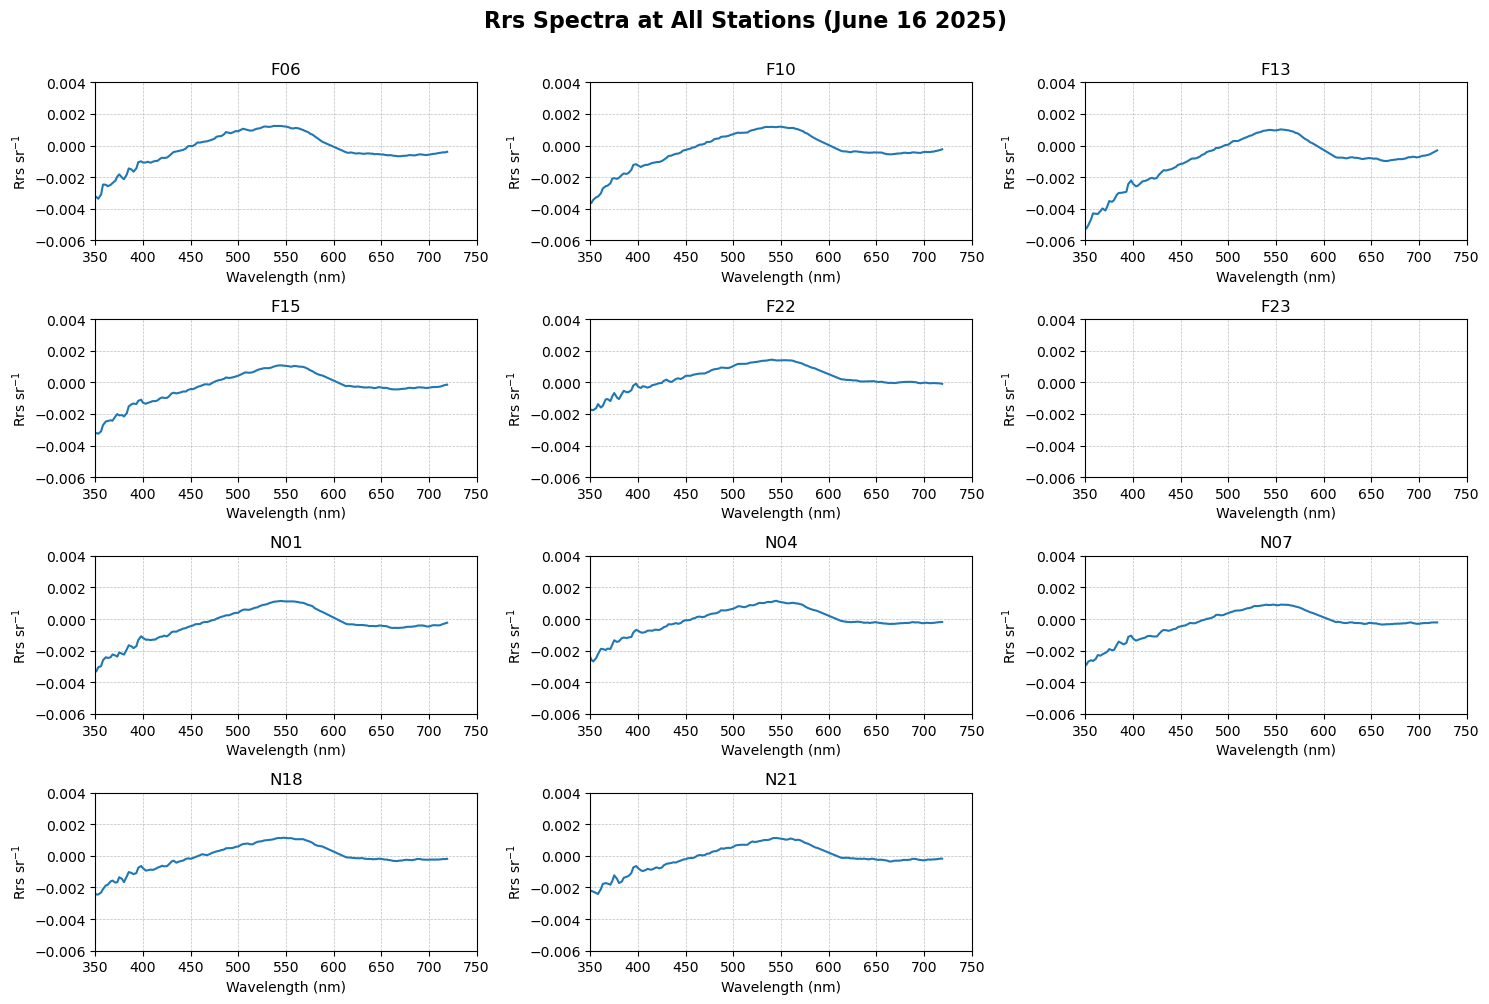

In [12]:
# Lat/lon grids
lat_grid = ds["latitude"].values
lon_grid = ds["longitude"].values

# Number of stations
n_stations = len(stations)

# Create a grid of subplots (adjust rows/cols as needed)
ncols = 3
nrows = (n_stations + ncols - 1) // ncols  # ceil division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easy indexing

for i, (name, plat, plon) in enumerate(stations):
    # Compute distances to all pixels
    dist = np.sqrt((lat_grid - plat)**2 + (lon_grid - plon)**2)
    y, x = np.unravel_index(dist.argmin(), dist.shape)
    
    # Extract spectrum
    spectrum = ds["Rrs"].isel(number_of_lines=y, pixels_per_line=x)
    
    # Plot in its own subplot
    ax = axes[i]
    spectrum.plot.line(x="wavelength_3d", ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Rrs sr$^{-1}$")
    ax.set_ylim(-0.006, 0.004)
    ax.set_xlim(350, 750)
    ax.grid(True, linewidth=0.5,linestyle="--", color="gray", alpha=0.5)


# Hide any extra subplots if n_stations < nrows*ncols
for j in range(n_stations, len(axes)):
    fig.delaxes(axes[j])

# Add global title
fig.suptitle("Rrs Spectra at All Stations (June 16 2025)", fontsize=16, fontweight="bold", y=1)

fig.tight_layout()

fig.savefig("rrs_spectra_all_stations_20250616.png",dpi=300,bbox_inches="tight")

plt.show()


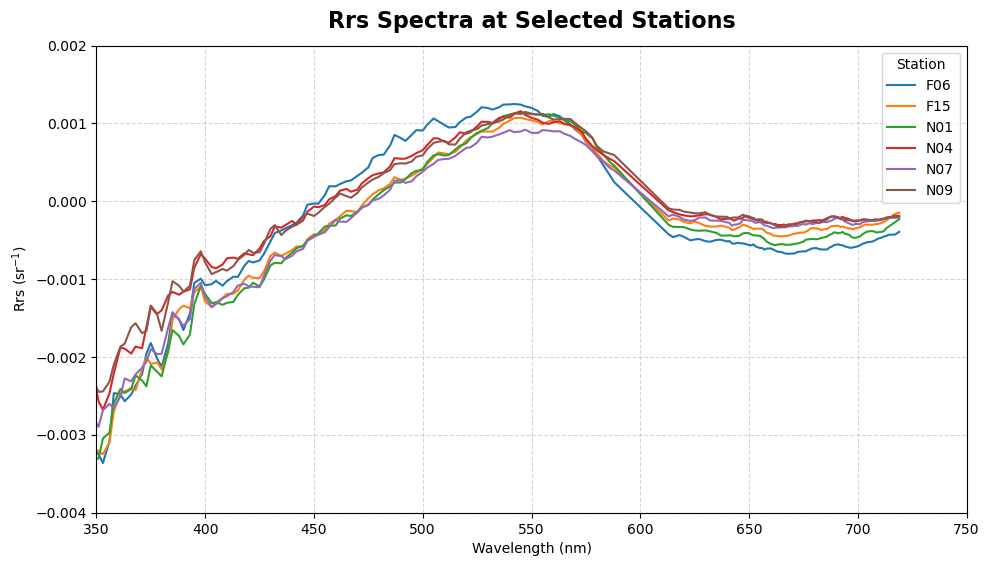

In [31]:
points = [
    ("F06", 42.17067, -70.57667),
    ("F15", 42.31550, -70.72767),
    ("N01", 42.41933, -70.86450),
    ("N04", 42.44383, -70.73650),
    ("N07", 42.35633, -70.70617),
    ("N09", 42.36583, -70.77767)
]

lat_grid = ds["latitude"].values
lon_grid = ds["longitude"].values

# Create figure and assign to variable
fig, ax = plt.subplots(figsize=(10,6))

for name, plat, plon in points:

    dist = np.sqrt((lat_grid - plat)**2 + (lon_grid - plon)**2)
    y, x = np.unravel_index(dist.argmin(), dist.shape)

    spectrum = ds["Rrs"].isel(number_of_lines=y, pixels_per_line=x)

    spectrum.plot.line(
        x="wavelength_3d",
        ax=ax,          # plot on our explicitly created axis
        label=name
    )

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Rrs (sr$^{-1}$)")
ax.set_title("Rrs Spectra at Selected Stations", fontsize=16, fontweight="bold", y=1.02)
ax.set_xlim(350, 750)
ax.set_ylim(-0.004, 0.002)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Station")

fig.tight_layout(rect=[0,0,1,0.96])  # leave room for suptitle

# Save using the explicit figure variable
fig.savefig("rrs_spectra_selected_stations_20250616.png", dpi=300, bbox_inches="tight")

plt.show()